In [153]:
%matplotlib notebook

import pandas as pd
import yfinance as yf
import mplfinance as mf
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator
from indicator_funcs import sma, backtesting, buysell, ema, macd, rsi, in_squeeze, ttm, adx_indicator, dx 
from processData import grabTickers, parse_file, grabDataPaths, grabData
import xlrd
from datetime import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
today = pd.Timestamp('today')
xle = yf.download( 'XLE',
                        start = '2020-01-01',
                        end = today,
                        progress = False)

macd(xle)
rsi(xle)
ttm(xle)
adx_indicator(xle)



/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,...,Adj Open,Adj High,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg,trend_signal,adx_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,54.150002,55.220001,54.009998,55.160000,51.172787,24430500,56.997673,1,54.330744,1,...,50.235796,51.228451,50.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-01-31,54.230000,54.380001,53.160000,53.439999,49.577118,33430500,56.450339,1,16.058357,0,...,50.310014,50.449173,49.317359,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-03,53.369999,53.450001,52.549999,52.740002,48.927715,21289200,55.879518,1,15.384585,0,...,49.512173,49.586392,48.751447,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-04,53.500000,53.919998,52.830002,52.930000,49.103981,19819800,55.425746,1,7.279650,0,...,49.632779,50.022417,49.011211,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-05,53.810001,55.110001,53.779999,54.919998,50.950134,34382000,55.347938,1,75.694495,1,...,49.920373,51.126402,49.892539,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,49.959999,50.880001,49.799999,50.750000,50.750000,22870000,0.212991,1,60.000000,1,...,49.959999,50.880001,49.799999,27.255602,19.643846,15.236256,27.255602,19.643846,0,0
2021-05-04,50.849998,51.230000,50.200001,50.779999,50.779999,26958800,0.327872,1,52.059938,1,...,50.849998,51.230000,50.200001,27.652667,18.483989,15.567443,27.652667,18.483989,0,0
2021-05-05,51.410000,52.580002,51.410000,52.419998,52.419998,23462100,0.544969,1,100.000000,1,...,51.410000,52.580002,51.410000,32.387807,16.635431,16.750659,32.387807,16.635431,0,0


<IPython.core.display.Javascript object>


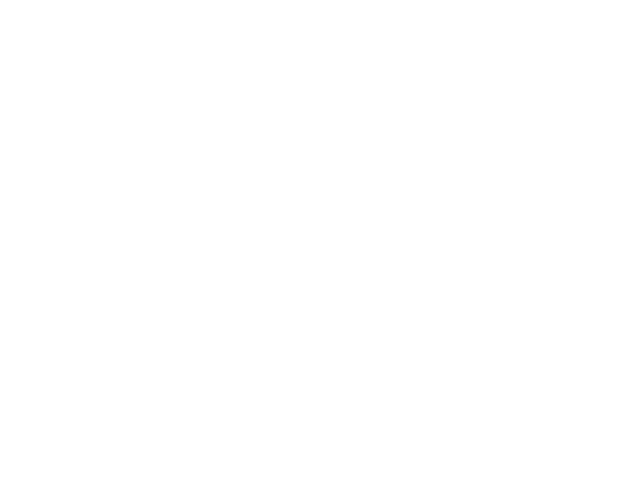

In [3]:
plt.close()
plt.plot(xle['rsi_indicator']+xle['adx_indicator']+xle['ttm_indicator']+xle['macd_indicator'])
plt.show()

In [221]:
tickers = grabTickers('tickersymbs.txt')
today = pd.Timestamp('today')
start = 255
stop = 310

for n in range(0,10):
    globals()[tickers[n]] = yf.download(tickers[n],
                        start = '2020-01-01',
                        end = today,
                        progress = False)
    globals()[tickers[n]] = macd(globals()[tickers[n]])
    globals()[tickers[n]] = rsi(globals()[tickers[n]])
    globals()[tickers[n]] = ttm(globals()[tickers[n]])
    globals()[tickers[n]] = adx_indicator(globals()[tickers[n]]) 
    
    file = xlrd.open_workbook(tickers[n]+'_Final.xls')
    sheet = file.sheet_by_name('Sheet1')
    VIX = []
    date = []
    buy_sell = []
    dates_buy = []
    dates_sell = []
    
    # Get Data from Files
    for i in range(0,sheet.nrows):
        VIX.append(sheet.cell_value(i, 1))
        d = xlrd.xldate_as_datetime(sheet.cell_value(i, 0), 0)
        date.append(d.strftime("%Y-%m-%d"))

    d = dx(VIX)
    d = sma(d,4)
    for k in range(4,len(d)):
        if(d[k] > 0):
            buy_sell.append(0)
            dates_buy.append(date[k])
        else:
            buy_sell.append(1)
            dates_sell.append(date[k])

    temp = np.zeros(len(globals()[tickers[n]]))
    temp2 = np.zeros(len(globals()[tickers[n]]))
        
    temp[start:(start+len(VIX))] = VIX
    temp2[start:(start+len(buy_sell))] = buy_sell

    globals()[tickers[n]]['vix'] = temp
    globals()[tickers[n]]['vix_indicator'] = temp2

/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [222]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
XLI


,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,20sma,stddev,lower_band,upper_band,TR,ATR,lower_keltner,upper_keltner,ttm_indicator,Adj Open,Adj High,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg,trend_signal,adx_indicator,vix,vix_indicator
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-30,82.139999,83.120003,81.970001,83.029999,81.122276,13158200,83.051919,1,100.000000,1,83.211501,0.597789,82.015923,84.407078,1.150002,0.828000,81.969501,84.453500,1,80.252726,81.210212,80.086634,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-01-31,82.580002,82.699997,80.800003,81.110001,79.246391,19083600,82.753162,1,21.632630,0,83.116500,0.760363,81.595775,84.637226,1.899994,0.864000,81.820501,84.412500,0,80.682617,80.799855,78.943516,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-03,81.550003,82.230003,80.989998,81.080002,79.217087,15676600,82.495753,1,4.411600,0,83.028001,0.885691,81.256618,84.799383,1.240005,0.878000,81.711001,84.345000,0,79.676289,80.340666,79.129151,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-04,82.320000,82.809998,82.239998,82.610001,80.711922,13597200,82.513329,1,43.965536,0,83.014501,0.890113,81.234276,84.794726,0.570000,0.875500,81.701251,84.327750,0,80.428584,80.907323,80.350420,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-05,83.540001,84.000000,83.110001,83.989998,82.060226,12835800,82.740509,1,98.979632,1,83.078501,0.912794,81.252913,84.904089,0.889999,0.883500,81.753251,84.403751,0,81.620569,82.069999,81.200448,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-06,84.330002,84.400002,83.720001,84.260002,82.324028,8627600,82.974277,1,100.000000,1,83.142001,0.949740,81.242520,85.041482,0.680000,0.881000,81.820501,84.463501,0,82.392419,82.460811,81.796434,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-07,83.940002,84.150002,83.580002,83.650002,81.728035,12394500,83.078235,1,73.008848,1,83.157501,0.955653,81.246195,85.068808,0.570000,0.892000,81.819501,84.495501,0,82.011373,82.216547,81.659644,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-10,83.519997,84.139999,83.419998,84.120003,82.187241,8074200,0.125814,1,54.814974,1,83.226001,0.973834,81.278334,85.173669,0.720001,0.883000,81.901502,84.550501,0,81.601020,82.206778,81.503320,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-11,84.550003,84.839996,84.230003,84.440002,82.499878,6291400,0.212340,1,56.428575,1,83.276501,1.010468,81.255565,85.297438,0.609993,0.880000,81.956502,84.596501,0,82.607351,82.890681,82.294704,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0


In [220]:
XLI['Open'].iloc[310]

100.58000183105469

In [217]:
stop

320

In [6]:
tickers

['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

In [224]:
n = 1

weights = [1,1,1,1,1]
init_balance = 1000
backtesting(globals()[tickers[n]],weights,init_balance,3,0)
#XLE

0.08828025089920902

<IPython.core.display.Javascript object>


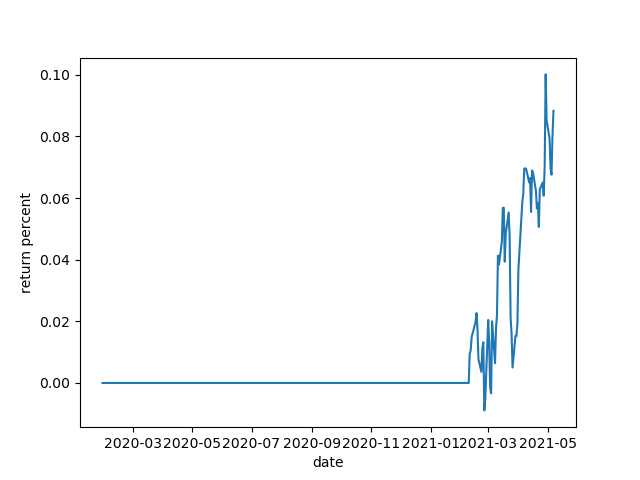

In [225]:
plt.close()
plt.plot(globals()[tickers[n]]['returns'])
plt.xlabel('date')
plt.ylabel('return percent')
#plt.plot(XLF['overall_indicator'])
plt.show()

In [257]:
import itertools
from itertools import zip_longest

init_balance = 1000

adx_weight = [1,2,3,4,5]
rsi_weight = [1,2,3,4,5]
ttm_weight = [1,2,3,4,5]
vix_weight = [1,2,3,4,5]
macd_weight = [1,2,3,4,5]
buy = [4,5,6,7]
sell = [0,1,2,3]

def optimize_weights(data,adx_weights,rsi_weights,ttm_weights,vix_weights,macd_weights,buy,sell):
    s = [adx_weights,rsi_weights,ttm_weights,vix_weights,macd_weights]
    permutations = list(itertools.product(*s))
    temp_returns = 0
    optimized_weight = [0,0,0,0,0]
    s2 = [buy,sell]
    permutations_buy_sell = list(itertools.product(*s2))
    optimized_buy_sell = [0,0]
    for buy_sell in permutations_buy_sell:
        for permutation in permutations:
            temp = backtesting(data,permutation,init_balance,buy_sell[0],buy_sell[1]) 
            if temp > temp_returns:
                temp_returns = temp
                optimized_weight = permutation
                optimized_buy_sell = buy_sell
    return optimized_weight,optimized_buy_sell

In [258]:
XLE_weights,XLE_b = optimize_weights(XLE,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLE_weights,XLE_b

((3, 1, 1, 1, 2), (4, 2))

In [259]:
XLC_weights,XLC_b = optimize_weights(XLC,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLC_weights,XLC_b 

((1, 1, 1, 1, 3), (4, 3))

In [260]:
XLI_weights,XLI_b = optimize_weights(XLI,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLI_weights,XLI_b

((2, 1, 1, 1, 2), (4, 2))

In [261]:
XLK_weights,XLK_b = optimize_weights(XLK,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLK_weights,XLK_b

((1, 1, 1, 1, 3), (4, 2))

In [262]:
XLF_weights,XLF_b = optimize_weights(XLF,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLF_weights,XLF_b 

((1, 1, 1, 1, 3), (4, 3))

In [263]:
XLB_weights,XLB_b = optimize_weights(XLB,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLB_weights,XLB_b

((1, 1, 1, 1, 4), (4, 0))

In [264]:
XLV_weights,XLV_b = optimize_weights(XLV,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLV_weights,XLV_b

((2, 1, 5, 2, 1), (6, 1))

In [265]:
XLY_weights,XLY_b = optimize_weights(XLY,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLY_weights,XLY_b

((1, 1, 1, 1, 4), (4, 0))

In [266]:
XLU_weights,XLU_b = optimize_weights(XLU,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLU_weights,XLU_b

((3, 1, 2, 1, 4), (4, 2))

In [267]:
XLP_weights,XLP_b = optimize_weights(XLP,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLP_weights,XLP_b

((2, 1, 1, 2, 2), (4, 1))

(2, 1, 1, 2, 2)

In [60]:
XLE_weights =[3, 1, 2, 1, 3]
XLE_b_s = [3, 2]

XLC_weights= [1, 1, 1, 1, 1]
XLC_b_s = [3,1]

XLI_weights=[2,1,1,1,2]
XLI_b_s=[3,2]

XLK_weights= [2,1,1,1,2]
XLK_b_s = [4,1]

XLF_weights=[1,1,1,1,2]
XLF_b_s = [3,1] 

XLB_weights=[1,1,2,1,1]
XLB_b_s = [4,0]

XLV_weights=[3,1,1,1,3]
XLV_b_s =[3,2]

XLY_weights=[1,1,1,1,3]
XLY_b_s=[3,2]

XLU_weights=[3,1,1,1,3]
XLU_b_s = [3,2]

XLP_weights=[1,1,1,1,2]
XLP_b_s =[3,0]


In [22]:
tickers

['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

<IPython.core.display.Javascript object>


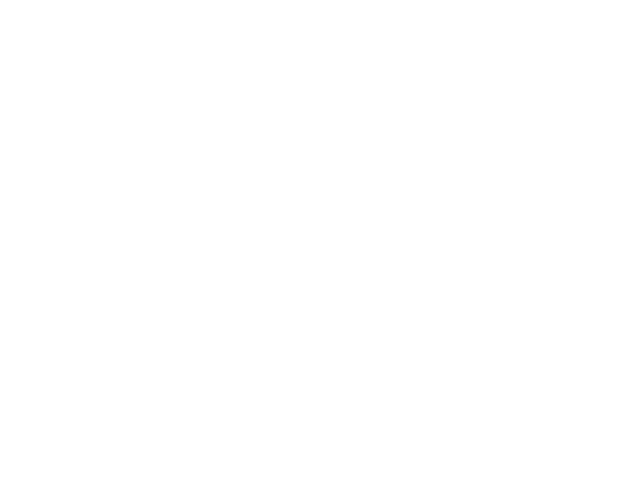

In [23]:
n = 5

backtesting(XLP,XLP_weights,init_balance,XLP_b[0],XLP_b[1])
plt.close()
plt.plot(XLP['returns'].iloc[start:-1])
#plt.plot(XLP['Close'].iloc[273:-1])
plt.xlabel('date')
plt.ylabel('return percent')
#plt.plot(XLF['overall_indicator'])
plt.show()

In [24]:
backtesting(XLP,XLP_weights,init_balance,XLP_b[0],XLP_b[1])


0.0997793234267026

<IPython.core.display.Javascript object>


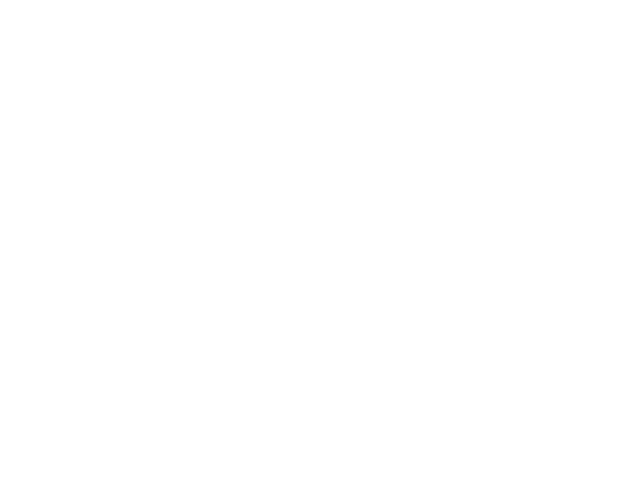

In [25]:
plt.close()
backtesting(XLP,XLP_weights,init_balance,XLP_b[0],XLP_b[1])
fig = plt.figure()
fig.suptitle('XLP Portfolio Returns vs. Naive Buy and Hold')
#plt.plot(XLP['returns'].iloc[273:-1])
plt.plot(XLP['Close'].iloc[start:-1])
plt.xlabel('date')
plt.ylabel('Price')
#plt.plot(XLF['overall_indicator'])
plt.show()

<IPython.core.display.Javascript object>


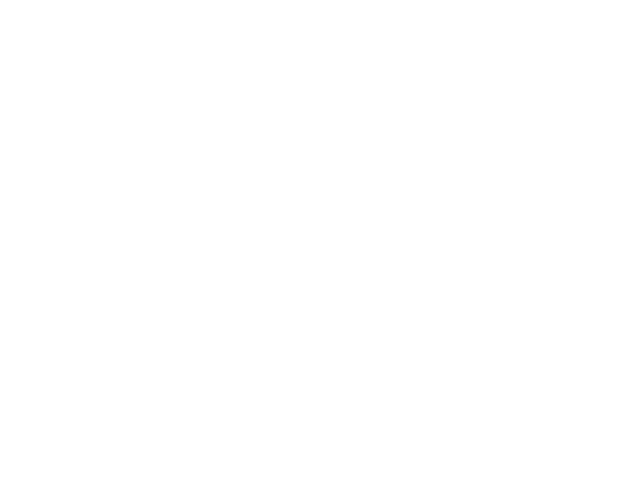

<ipython-input-26-f628d0e7691b>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(XLP['vix'])


<StemContainer object of 3 artists>

In [26]:
plt.close()
plt.stem(XLP['vix'])

In [27]:
XLP['returns'].iloc[-1]

0.0997793234267026

In [40]:
def stock_returns(data,start):
    returns = np.zeros(len(data))
    for i in range(start,len(data)):
        returns[i] = (data['Close'].iloc[i]-data['Close'].iloc[start])/data['Close'].iloc[start]
    return returns


def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [181]:
start = 265
stop = 320
#len(XLP_returns[0:stop-start]*100)
#len(XLP['returns'].iloc[start:stop]*100)
backtesting(XLP,XLP_weights,init_balance,XLP_b[0],XLP_b[1])
XLP_returns = stock_returns(XLP,start+1)

for i in range(0,len(XLP)):
    print(XLP['vix'].iloc[i])
    print(XLP.index[i])
XLP_indices = np.where(XLP['buy_sell'] == 1,1,0)
XLP_indices = zero_to_nan(XLP_indices)

0.0
2020-01-30 00:00:00
0.0
2020-01-31 00:00:00
0.0
2020-02-03 00:00:00
0.0
2020-02-04 00:00:00
0.0
2020-02-05 00:00:00
0.0
2020-02-06 00:00:00
0.0
2020-02-07 00:00:00
0.0
2020-02-10 00:00:00
0.0
2020-02-11 00:00:00
0.0
2020-02-12 00:00:00
0.0
2020-02-13 00:00:00
0.0
2020-02-14 00:00:00
0.0
2020-02-18 00:00:00
0.0
2020-02-19 00:00:00
0.0
2020-02-20 00:00:00
0.0
2020-02-21 00:00:00
0.0
2020-02-24 00:00:00
0.0
2020-02-25 00:00:00
0.0
2020-02-26 00:00:00
0.0
2020-02-27 00:00:00
0.0
2020-02-28 00:00:00
0.0
2020-03-02 00:00:00
0.0
2020-03-03 00:00:00
0.0
2020-03-04 00:00:00
0.0
2020-03-05 00:00:00
0.0
2020-03-06 00:00:00
0.0
2020-03-09 00:00:00
0.0
2020-03-10 00:00:00
0.0
2020-03-11 00:00:00
0.0
2020-03-12 00:00:00
0.0
2020-03-13 00:00:00
0.0
2020-03-16 00:00:00
0.0
2020-03-17 00:00:00
0.0
2020-03-18 00:00:00
0.0
2020-03-19 00:00:00
0.0
2020-03-20 00:00:00
0.0
2020-03-23 00:00:00
0.0
2020-03-24 00:00:00
0.0
2020-03-25 00:00:00
0.0
2020-03-26 00:00:00
0.0
2020-03-27 00:00:00
0.0
2020-03-30 0

<IPython.core.display.Javascript object>


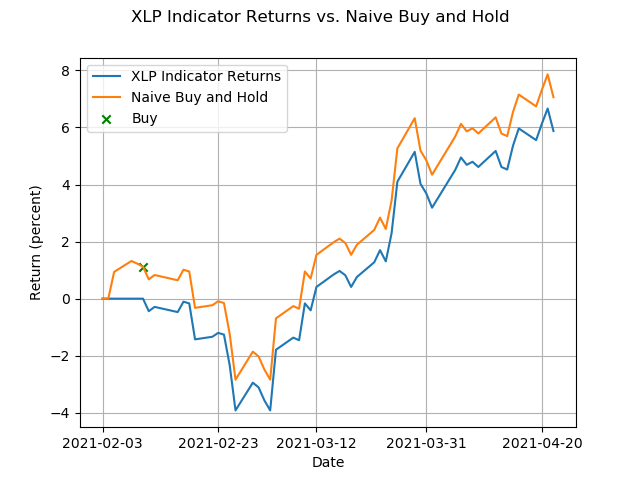

In [317]:
backtesting(XLP,XLP_weights,init_balance,XLP_b[0],XLP_b[1])
XLP_returns = stock_returns(XLP,start+1)
XLP_buy = zero_to_nan(np.where(XLP['buy_sell'] == 1,1,0))
XLP_sell = zero_to_nan(np.where(XLP['buy_sell'] == -1,1,0))


plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLP Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLP.index[start:stop],XLP['returns'].iloc[start:stop]*100,label='XLP Indicator Returns')
plt.plot(XLP.index[start:stop],XLP_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLP.index[start:stop],XLP_returns[start:stop]*100*XLP_buy[start:stop],color='g',marker='x',label='Buy')
#plt.scatter(XLP.index[start:stop],XLP_returns[start:stop]*100*XLP_sell[start:stop],color='r',marker='x',label='Sell')

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLP.index[start:stop:13])
plt.legend()
plt.grid()
fig.savefig('XLP.png')

#plt.plot(XLF['overall_indicator'])
plt.show()

<IPython.core.display.Javascript object>


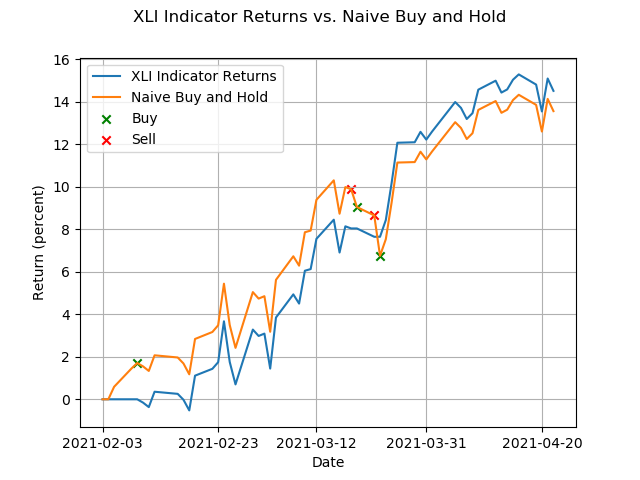

In [316]:
backtesting(XLI,XLI_weights,init_balance,XLI_b[0],XLI_b[1])
XLI_returns = stock_returns(XLI,start+1)
XLI_buy = zero_to_nan(np.where(XLI['buy_sell'] == 1,1,0))
XLI_sell = zero_to_nan(np.where(XLI['buy_sell'] == -1,1,0))


plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLI Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLI.index[start:stop],XLI['returns'].iloc[start:stop]*100,label='XLI Indicator Returns')
plt.plot(XLI.index[start:stop],XLI_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLI.index[start:stop],XLI_returns[start:stop]*100*XLI_buy[start:stop],color='g',marker='x',label='Buy')
plt.scatter(XLI.index[start:stop],XLI_returns[start:stop]*100*XLI_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLI.index[start:stop:13])
plt.legend()
fig.savefig('XLI.png')

#plt.plot(XLF['overall_indicator'])
plt.show()

<IPython.core.display.Javascript object>


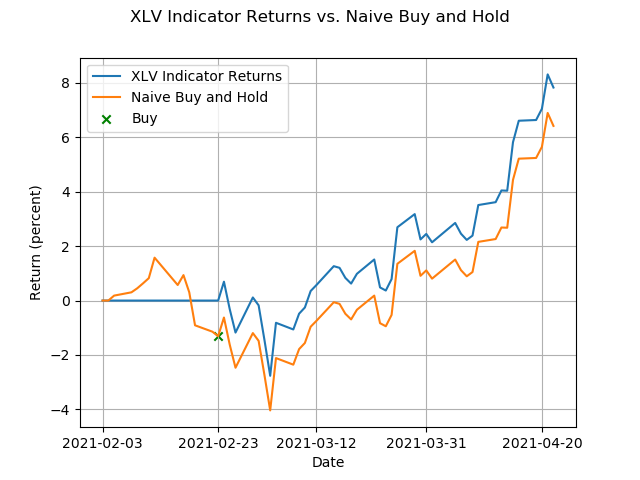

In [315]:
backtesting(XLV,XLV_weights,init_balance,XLV_b[0],XLV_b[1])
XLV_returns = stock_returns(XLV,start+1)
XLV_buy = zero_to_nan(np.where(XLV['buy_sell'] == 1,1,0))
XLV_sell = zero_to_nan(np.where(XLV['buy_sell'] == -1,1,0))


plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLV Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLV.index[start:stop],XLV['returns'].iloc[start:stop]*100,label='XLV Indicator Returns')
plt.plot(XLV.index[start:stop],XLV_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLV.index[start:stop],XLV_returns[start:stop]*100*XLV_buy[start:stop],color='g',marker='x',label='Buy')
#plt.scatter(XLV.index[start:stop],XLV_returns[start:stop]*100*XLV_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLV.index[start:stop:13])
plt.legend()
fig.savefig('XLV.png')

#plt.plot(XLF['overall_indicator'])
plt.show()

<IPython.core.display.Javascript object>


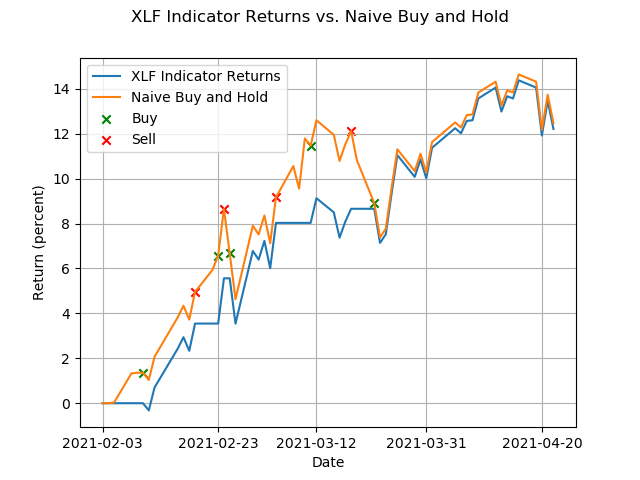

In [313]:
backtesting(XLF,XLF_weights,init_balance,XLF_b[0],XLF_b[1])
XLF_returns = stock_returns(XLF,start+1)
XLF_buy = zero_to_nan(np.where(XLF['buy_sell'] == 1,1,0))
XLF_sell = zero_to_nan(np.where(XLF['buy_sell'] == -1,1,0))


plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLF Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLF.index[start:stop],XLF['returns'].iloc[start:stop]*100,label='XLF Indicator Returns')
plt.plot(XLF.index[start:stop],XLF_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLF.index[start:stop],XLF_returns[start:stop]*100*XLF_buy[start:stop],color='g',marker='x',label='Buy')
plt.scatter(XLF.index[start:stop],XLF_returns[start:stop]*100*XLF_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLF.index[start:stop:13])
plt.legend()
fig.savefig('XLF.png')

#plt.plot(XLF['overall_indicator'])
plt.show()

<IPython.core.display.Javascript object>


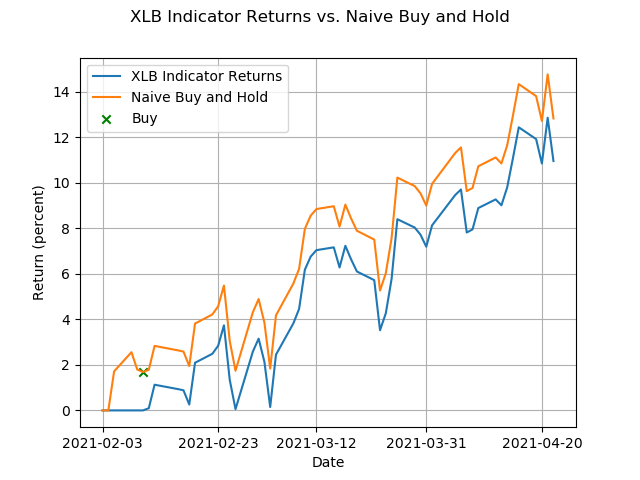

In [314]:
backtesting(XLB,XLB_weights,init_balance,XLB_b[0],XLB_b[1])
XLB_returns = stock_returns(XLB,start+1)
XLB_buy = zero_to_nan(np.where(XLB['buy_sell'] == 1,1,0))
XLB_sell = zero_to_nan(np.where(XLB['buy_sell'] == -1,1,0))


plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLB Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLB.index[start:stop],XLB['returns'].iloc[start:stop]*100,label='XLB Indicator Returns')
plt.plot(XLB.index[start:stop],XLB_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLB.index[start:stop],XLB_returns[start:stop]*100*XLB_buy[start:stop],color='g',marker='x',label='Buy')
#plt.scatter(XLB.index[start:stop],XLB_returns[start:stop]*100*XLB_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLB.index[start:stop:13])
plt.legend()
fig.savefig('XLB.png')

plt.show()

<IPython.core.display.Javascript object>


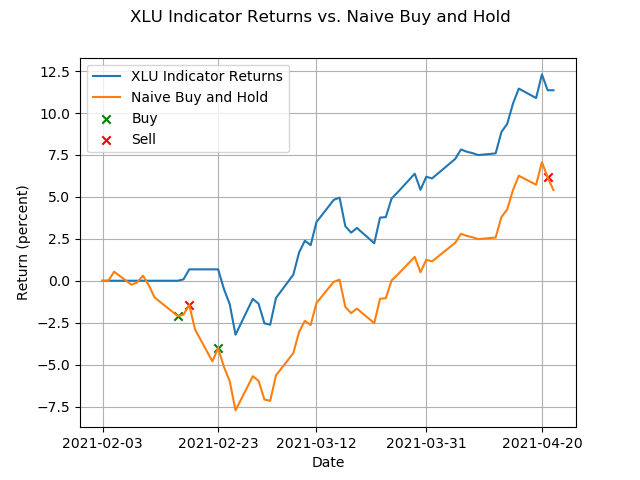

In [312]:
backtesting(XLU,XLU_weights,init_balance,XLU_b[0],XLU_b[1])
XLU_returns = stock_returns(XLU,start+1)
XLU_buy = zero_to_nan(np.where(XLU['buy_sell'] == 1,1,0))
XLU_sell = zero_to_nan(np.where(XLU['buy_sell'] == -1,1,0))

plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLU Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLU.index[start:stop],XLU['returns'].iloc[start:stop]*100,label='XLU Indicator Returns')
plt.plot(XLU.index[start:stop],XLU_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLU.index[start:stop],XLU_returns[start:stop]*100*XLU_buy[start:stop],color='g',marker='x',label='Buy')
plt.scatter(XLU.index[start:stop],XLU_returns[start:stop]*100*XLU_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLU.index[start:stop:13])
plt.legend()
fig.savefig('XLU.png')

plt.show()

<IPython.core.display.Javascript object>


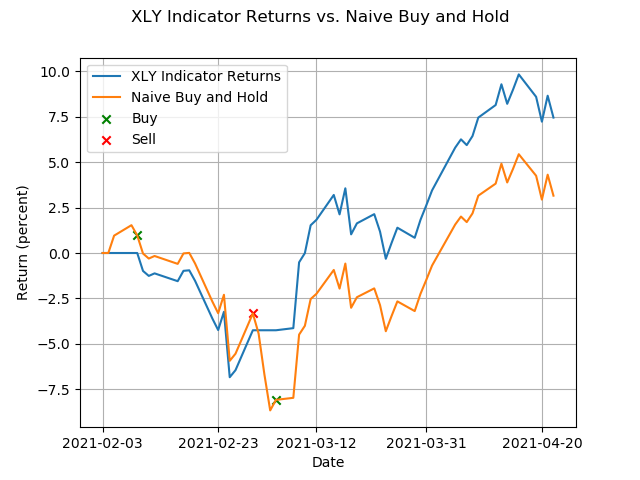

In [311]:
backtesting(XLY,XLY_weights,init_balance,XLY_b[0],XLY_b[1])
XLY_returns = stock_returns(XLY,start+1)
XLY_buy = zero_to_nan(np.where(XLY['buy_sell'] == 1,1,0))
XLY_sell = zero_to_nan(np.where(XLY['buy_sell'] == -1,1,0))

plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLY Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLY.index[start:stop],XLY['returns'].iloc[start:stop]*100,label='XLY Indicator Returns')
plt.plot(XLY.index[start:stop],XLY_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLY.index[start:stop],XLY_returns[start:stop]*100*XLY_buy[start:stop],color='g',marker='x',label='Buy')
plt.scatter(XLY.index[start:stop],XLY_returns[start:stop]*100*XLY_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLY.index[start:stop:13])
plt.legend()
fig.savefig('XLY.png')

plt.show()

<IPython.core.display.Javascript object>


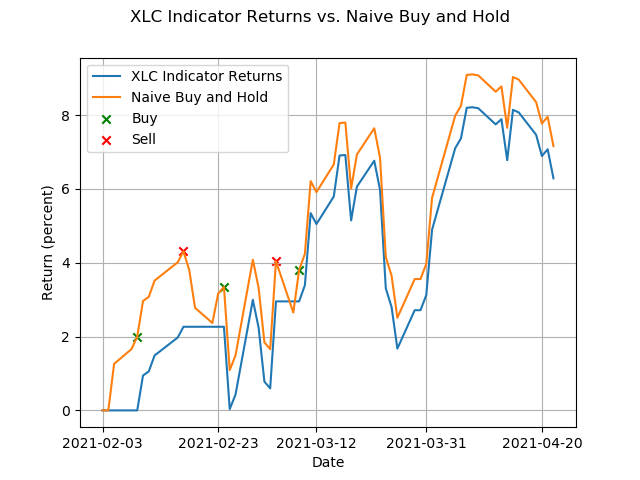

In [310]:
backtesting(XLC,XLC_weights,init_balance,XLC_b[0],XLC_b[1])
XLC_returns = stock_returns(XLC,start+1)
XLC_buy = zero_to_nan(np.where(XLC['buy_sell'] == 1,1,0))
XLC_sell = zero_to_nan(np.where(XLC['buy_sell'] == -1,1,0))

plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLC Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLC.index[start:stop],XLC['returns'].iloc[start:stop]*100,label='XLC Indicator Returns')
plt.plot(XLC.index[start:stop],XLC_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLC.index[start:stop],XLC_returns[start:stop]*100*XLC_buy[start:stop],color='g',marker='x',label='Buy')
plt.scatter(XLC.index[start:stop],XLC_returns[start:stop]*100*XLC_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLC.index[start:stop:13])
plt.legend()
fig.savefig('XLC.png')

plt.show()

<IPython.core.display.Javascript object>


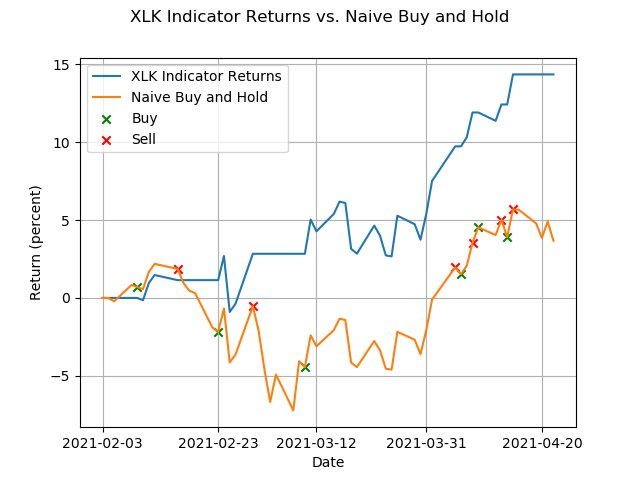

In [309]:
backtesting(XLK,XLK_weights,init_balance,XLK_b[0],XLK_b[1])
XLK_returns = stock_returns(XLK,start+1)
XLK_buy = zero_to_nan(np.where(XLK['buy_sell'] == 1,1,0))
XLK_sell = zero_to_nan(np.where(XLK['buy_sell'] == -1,1,0))

plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLK Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLK.index[start:stop],XLK['returns'].iloc[start:stop]*100,label='XLK Indicator Returns')
plt.plot(XLK.index[start:stop],XLK_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLK.index[start:stop],XLK_returns[start:stop]*100*XLK_buy[start:stop],color='g',marker='x',label='Buy')
plt.scatter(XLK.index[start:stop],XLK_returns[start:stop]*100*XLK_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLK.index[start:stop:13])
plt.legend()
fig.savefig('XLK.png')

plt.show()

<IPython.core.display.Javascript object>


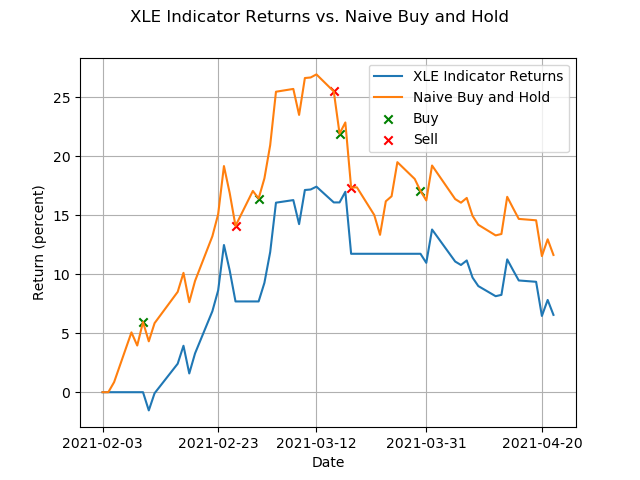

In [308]:


backtesting(XLE,XLE_weights,init_balance,XLE_b[0],XLE_b[1])
XLE_returns = stock_returns(XLE,start+1)
XLE_buy = zero_to_nan(np.where(XLE['buy_sell'] == 1,1,0))
XLE_sell = zero_to_nan(np.where(XLE['buy_sell'] == -1,1,0))

plt.close()
fig,ax = plt.subplots()
fig.suptitle('XLE Indicator Returns vs. Naive Buy and Hold')
plt.plot(XLE.index[start:stop],XLE['returns'].iloc[start:stop]*100,label='XLE Indicator Returns')
plt.plot(XLE.index[start:stop],XLE_returns[start:stop]*100,label = 'Naive Buy and Hold')
plt.scatter(XLE.index[start:stop],XLE_returns[start:stop]*100*XLE_buy[start:stop],color='g',marker='x',label='Buy')
plt.scatter(XLE.index[start:stop],XLE_returns[start:stop]*100*XLE_sell[start:stop],color='r',marker='x',label='Sell')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLE.index[start:stop:13])
plt.legend()
fig.savefig('XLE.png')

plt.show()

In [107]:
#
#plot all portfolio returns vs stock returns (10 graphs)
#combined return vs s&p500 return (1 graph)
#do optimization part in methods section
#do discussion sectoin
XLK



,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,...,trend_signal,adx_indicator,vix,vix_indicator,overall_indicator,cash_balance,shares,total_balance,returns,buy_sell
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,97.139999,98.110001,96.550003,98.019997,96.535797,9966800,96.302217,1,100.000000,1,...,0,0,0.00,0.0,3.0,1000.0,0.000000,1000.000000,0.000000,0.0
2020-01-31,97.449997,97.500000,94.989998,95.330002,93.886543,13482300,96.152645,1,28.835949,0,...,0,0,0.00,0.0,1.0,1000.0,0.000000,1000.000000,0.000000,0.0
2020-02-03,95.440002,96.830002,95.330002,96.589996,95.127449,12537800,96.219930,1,43.841276,0,...,0,0,0.00,0.0,1.0,1000.0,0.000000,1000.000000,0.000000,0.0
2020-02-04,98.269997,99.330002,98.029999,99.120003,97.619148,9548900,96.666095,1,58.487707,1,...,0,0,0.00,0.0,3.0,1000.0,0.000000,1000.000000,0.000000,0.0
2020-02-05,100.750000,100.800003,98.980003,99.699997,98.190361,16348500,97.132849,1,100.000000,1,...,0,0,0.00,0.0,3.0,1000.0,0.000000,1000.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,140.449997,140.729996,138.960007,139.309998,139.309998,5402900,1.530335,1,0.000000,0,...,0,0,54.04,0.0,1.0,0.0,7.506881,1045.783607,0.045784,0.0
2021-05-04,138.270004,138.309998,135.289993,136.809998,136.809998,9959800,1.083120,1,0.000000,0,...,0,0,71.24,1.0,3.0,0.0,7.506881,1027.016404,0.027016,0.0
2021-05-05,137.929993,137.990005,136.220001,136.479996,136.479996,3205300,0.694069,1,0.000000,0,...,0,0,60.87,0.0,1.0,0.0,7.506881,1024.539119,0.024539,0.0


# Combined Return vs S&P 500 Return

In [281]:
XLK_balance = XLK['total_balance'].iloc[start:stop]
XLB_balance = XLB['total_balance'].iloc[start:stop]
XLC_balance = XLC['total_balance'].iloc[start:stop]
XLE_balance = XLE['total_balance'].iloc[start:stop]
XLF_balance = XLF['total_balance'].iloc[start:stop]
XLI_balance = XLI['total_balance'].iloc[start:stop]
XLV_balance = XLV['total_balance'].iloc[start:stop]
XLY_balance = XLY['total_balance'].iloc[start:stop]
XLU_balance = XLU['total_balance'].iloc[start:stop]
XLP_balance = XLP['total_balance'].iloc[start:stop]


combined_value=XLK_balance+XLB_balance+XLC_balance+XLE_balance+XLF_balance+XLI_balance+XLV_balance+XLY_balance+XLU_balance+XLP_balance

In [282]:
def returns(data,start):
    returns = np.zeros(len(data))
    for i in range(start,len(data)):
        returns[i] = (data[i]-data[start])/data[start]
    return returns

In [283]:

combined_returns = returns(combined_value.values,0)


In [284]:
SPY = yf.download( 'SPY',
                        start = '2020-01-01',
                        end = today,
                        progress = False)

In [285]:
spy_returns = stock_returns(SPY,start)

<IPython.core.display.Javascript object>


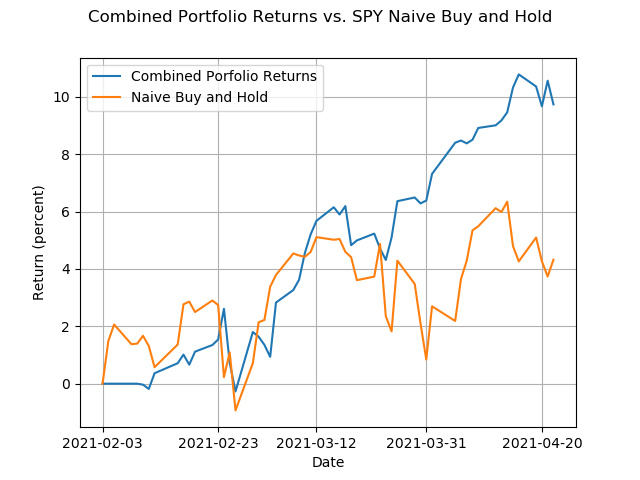

In [306]:
plt.close()
fig,ax = plt.subplots()
fig.suptitle('Combined Portfolio Returns vs. SPY Naive Buy and Hold')
plt.plot(XLE.index[start:stop],combined_returns*100,label='Combined Porfolio Returns')
plt.plot(XLE.index[start:stop],spy_returns[start:stop]*100,label = 'Naive Buy and Hold')

plt.xlabel('Date')
plt.ylabel('Return (percent)')
ax.set_xticks(XLE.index[start:stop:13])
plt.grid()
fig.savefig('combined.png')

plt.legend()
plt.show()

In [171]:
tickers

['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

<IPython.core.display.Javascript object>


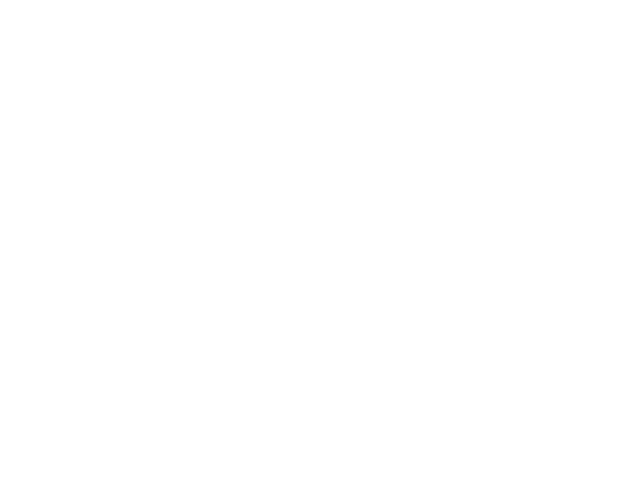

<IPython.core.display.Javascript object>


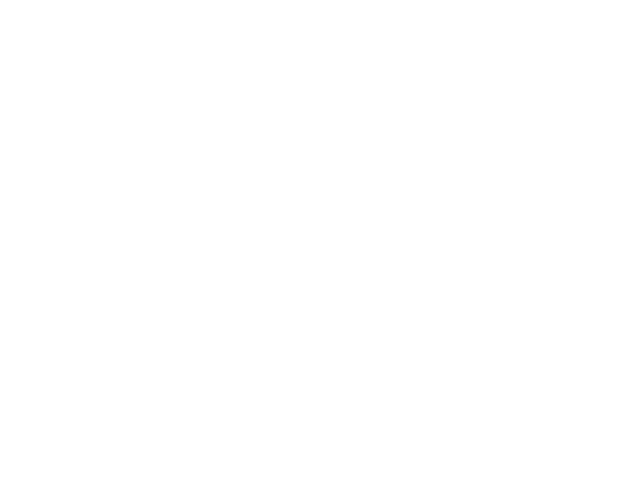

<IPython.core.display.Javascript object>


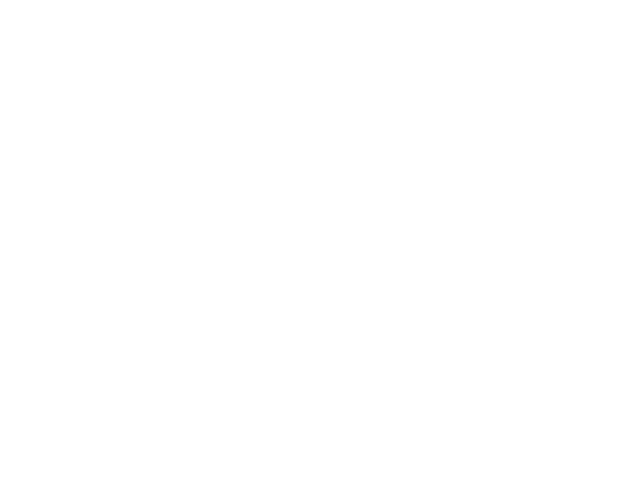

<IPython.core.display.Javascript object>


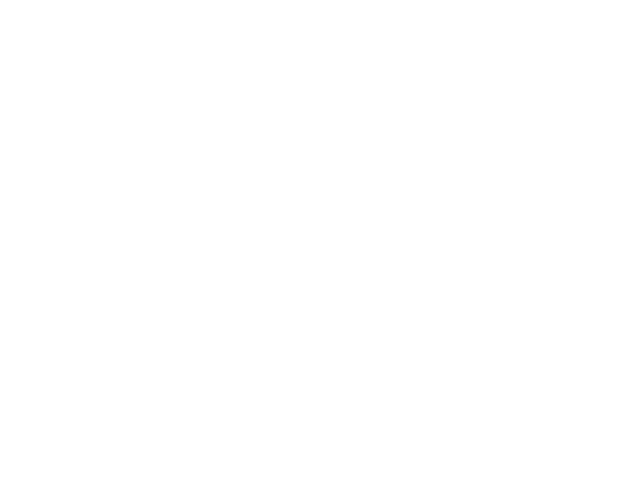

<IPython.core.display.Javascript object>


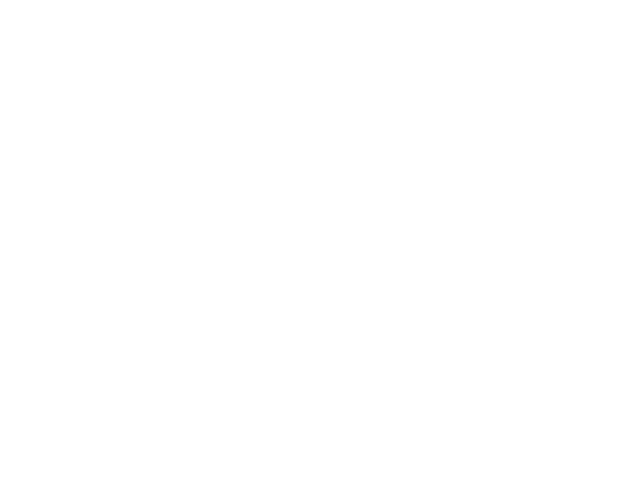

<IPython.core.display.Javascript object>


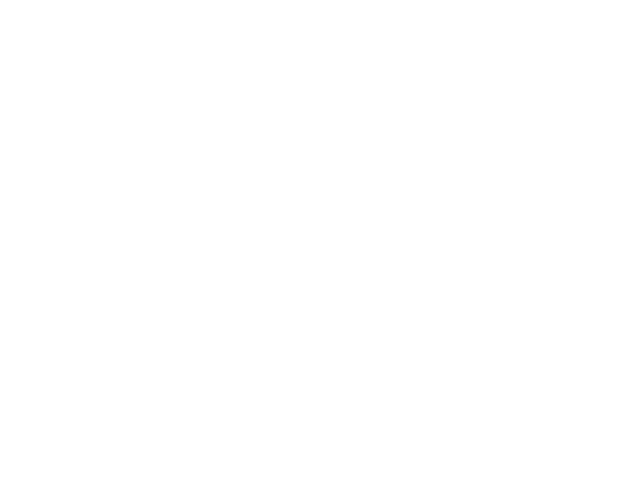

<IPython.core.display.Javascript object>


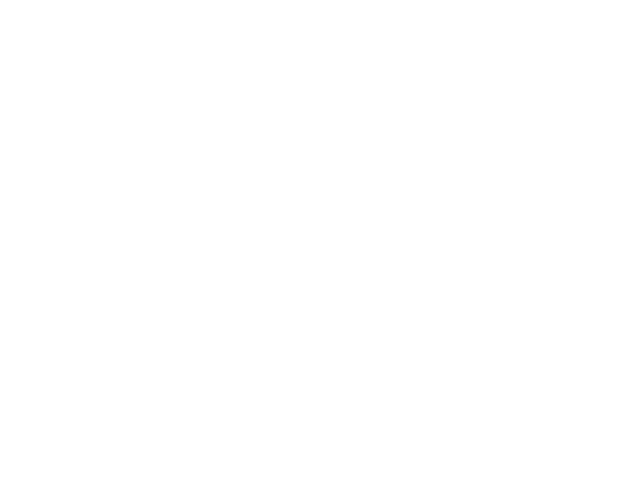

<IPython.core.display.Javascript object>


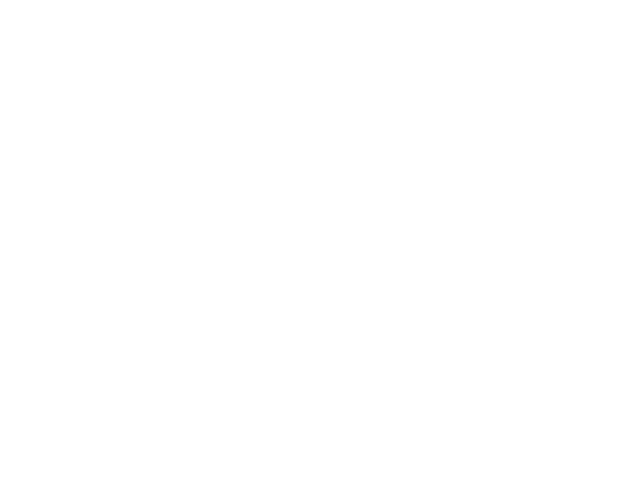

<IPython.core.display.Javascript object>


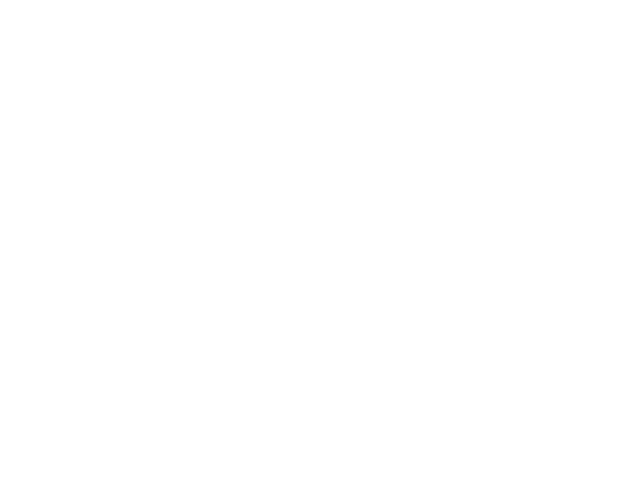

<IPython.core.display.Javascript object>


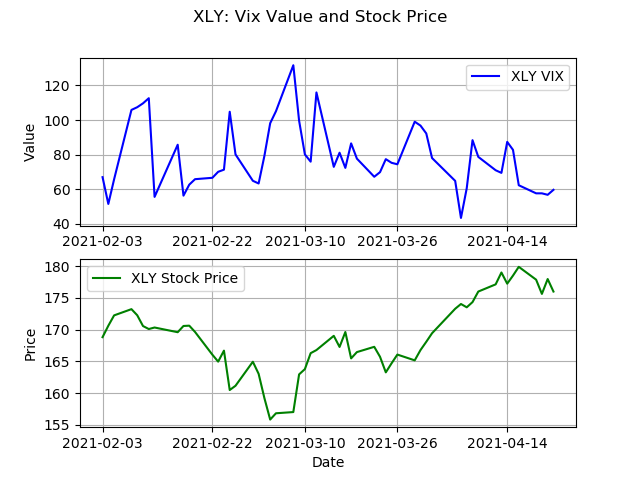

In [305]:
for n in range(0,10):

    plt.close()
    fig,ax = plt.subplots(2)
    fig.suptitle(tickers[n]+': Vix Value and Stock Price')
    ax[0].plot(globals()[tickers[n]].index[start:stop],globals()[tickers[n]]['vix'].iloc[start:stop],color='b',label= tickers[n]+' VIX')
    ax[1].plot(globals()[tickers[n]].index[start:stop],globals()[tickers[n]]['Close'].iloc[start:stop],color= 'g',label = tickers[n]+' Stock Price')

    #ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Value')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Price')
    ax[0].set_xticks(globals()[tickers[n]].index[start:stop:12])
    ax[1].set_xticks(globals()[tickers[n]].index[start:stop:12])
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    fig.savefig(tickers[n]+'_vix.png')


In [4]:
import matplotlib.pyplot as plt
import mplfinance
import numpy as np

def graphwerk(Open, High, low, close, instrument):
    # Create Prefixes for correct data
    if instrument == 'XAU/USD':
        prefix = 'xau'
    elif instrument == 'USOil':
        prefix = 'USOil'
    elif instrument == 'XAGUSD':
        prefix = 'xag'
    else:
        print('Instrument prefix is not defined in graphwerk')
        return

    fig = plt.figure(num=1, figsize=(3, 3), dpi=50, facecolor='w', edgecolor='k')
    dx = fig.add_subplot(111)
    mpl_finance.candlestick2_ochl(dx, open, close, high, low, width=1.5, colorup='g', colordown='r', alpha=0.5)
    plt.autoscale()
    # Create a moving average overlay

    sma = convolve_sma(close, 3)
    smb = list(sma)
    diff = sma[-1] - sma[-2]

    for x in range(len(close) - len(smb)):
        smb.append(smb[-1] + diff)

    dx2 = dx.twinx()
    dx2.plot(smb, color="blue", linewidth=8, alpha=0.5)
    dx2.axis('off')
    dx.axis('off')

    timestamp = int(time.time())
    file_name = realtime_data + str(prefix) +str(timestamp) + '.jpg'
    plt.savefig(file_name, bbox_inches='tight')
    #Uncomment this line to see the plot right after script runs.
    #plt.show
    plt.close()
    return file_name

In [3]:
import json
import requests as requests
import pandas as pd

In [4]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
hist.head()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2015-11-25,330.04,315.69,318.35,77684.42,25200934.79,327.52,direct,
2015-11-26,368.92,327.40,327.52,211376.80,73395832.57,353.74,direct,
2015-11-27,363.90,345.15,353.74,103479.86,36955394.20,359.52,direct,
2015-11-28,360.08,350.49,359.52,56171.07,19988111.49,355.83,direct,
2015-11-29,372.84,354.55,355.83,67365.88,24546100.04,370.84,direct,


In [21]:
today = pd.Timestamp('today')
eth = yf.download( 'ETH-USD',
                        start = '2020-01-01',
                        end = today,
                        period = '1y',
                        progress = False)

In [23]:
# GET CURRENT PRICE DATA
def get_current_data(from_sym='BTC', to_sym='USD', exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price'    
    
    parameters = {'fsym': from_sym,
                  'tsyms': to_sym }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    
    return data  

In [29]:
# GET HISTORICAL PRICE DATA
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'day', limit=2000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 
    
    return data      


#Transform json paylode into pd dataframe
def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df.tail())
    
    return df


def plot_data(df, cryptocurrency, target_currency):
    # got his warning because combining matplotlib 
    # and time in pandas converted from epoch to normal date
    # To register the converters:
    # 	>>> from pandas.plotting import register_matplotlib_converters
    # 	>>> register_matplotlib_converters()
    #  warnings.warn(msg, FutureWarning)
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None



In [115]:
cryptocurrency = 'ETH'
target_currency = 'USD'


data = get_hist_data(cryptocurrency, target_currency, 'hour', 2000)
df = data_to_dataframe(data)
df

baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'ETH', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}
                        high      low     open  volumefrom      volumeto  \
time                                                                       
2021-05-17 11:00:00  3528.54  3433.85  3448.05    30945.84  1.080709e+08   
2021-05-17 12:00:00  3545.08  3459.11  3520.41    26084.88  9.134486e+07   
2021-05-17 13:00:00  3493.81  3422.04  3483.33    27018.32  9.327473e+07   
2021-05-17 14:00:00  3467.44  3354.52  3458.73    50493.27  1.712957e+08   
2021-05-17 15:00:00  3413.37  3274.78  3391.11    59639.59  1.987288e+08   

                       close conversionType conversionSymbol  
time                                                          
2021-05-17 11:00:00  3520.41         direct                   
2021-05-17 12:00:00  3483.33         direct                   
2021-05-17 13:00:00  3458.73         direct                  

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-02-23 07:00:00,1617.89,1566.86,1577.07,60816.72,9.689801e+07,1585.66,direct,
2021-02-23 08:00:00,1597.50,1444.82,1585.66,206428.67,3.122027e+08,1444.88,direct,
2021-02-23 09:00:00,1514.45,1360.96,1444.88,245299.74,3.561484e+08,1498.51,direct,
2021-02-23 10:00:00,1522.54,1447.73,1498.51,104227.14,1.546268e+08,1478.19,direct,
2021-02-23 11:00:00,1501.84,1372.42,1478.19,200705.50,2.877183e+08,1454.85,direct,
...,...,...,...,...,...,...,...,...
2021-05-17 11:00:00,3528.54,3433.85,3448.05,30945.84,1.080709e+08,3520.41,direct,
2021-05-17 12:00:00,3545.08,3459.11,3520.41,26084.88,9.134486e+07,3483.33,direct,
2021-05-17 13:00:00,3493.81,3422.04,3483.33,27018.32,9.327473e+07,3458.73,direct,


In [165]:
num_features = 6
window = 5

X = np.zeros((len(df)-window-1,num_features*window))
y = np.zeros(len(X))
y.shape

(1995,)

In [166]:
for i in range(0,len(df)-window-1):
    a = df.iloc[i:i+5,[True,True, True, True, True, True,False,False]].values
    y[i] = df.iloc[i+6,[False,False, False, False, False, True,False,False]]
    X[i,:] = a.reshape(num_features*window)
    

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)


In [169]:

import torch
from sklearn.datasets import make_blobs

In [181]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [185]:
class FFNN(nn.Module):
    """Simple Feed Forward Neural Network with n hidden layers"""
    def __init__(self, input_size, num_hidden_layers, hidden_size, out_size, accuracy_function):
        super().__init__()
        self.accuracy_function = accuracy_function
        
        # Create first hidden layer
        self.input_layer = nn.Linear(input_size, hidden_size)
        
        # Create remaining hidden layers
        self.hidden_layers = nn.ModuleList()
        for i in range(0, num_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))
        
        # Create output layer
        self.output_layer = nn.Linear(hidden_size, out_size)
        
    def forward(self, input_image):
        # Flatten image
        input_image = input_image.view(input_image.size(0), -1)
        
        # Utilize hidden layers and apply activation function
        output = self.input_layer(input_image)
        output = F.relu(output)
        
        for layer in self.hidden_layers:
            output = layer(output)
            output = F.relu(output)
        
        # Get predictions
        output = self.output_layer(output)
        return output
    
    def training_step(self, batch):
        # Load batch
        images, labels = batch
        
        # Generate predictions
        output = self(images) 
        
        # Calculate loss
        loss = F.cross_entropy(output, labels)
        return loss
    
    def validation_step(self, batch):
        # Load batch
        images, labels = batch 

        # Generate predictions
        output = self(images) 
        
        # Calculate loss
        loss = F.cross_entropy(output, labels)

        # Calculate accuracy
        acc = self.accuracy_function(output, labels)
        
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        
        # Combine losses and return mean value
        epoch_loss = torch.stack(batch_losses).mean()
        
        # Combine accuracies and return mean value
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {} - Validation Loss: {:.4f}, Validation Accuracy: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [186]:
def forward(self, input_image):
    # Flatten image
    input_image = input_image.view(input_image.size(0), -1)

    # Utilize hidden layers and apply activation function
    output = self.input_layer(input_image)
    output = F.relu(output)

    for layer in self.hidden_layers:
        output = layer(output)
        output = F.relu(output)

    # Get predictions
    output = self.output_layer(output)
    return output

In [187]:
def training_step(self, batch):
    # Load batch
    images, labels = batch

    # Generate predictions
    output = self(images) 

    # Calculate loss
    loss = F.cross_entropy(output, labels)
    return loss

def validation_step(self, batch):
    # Load batch
    images, labels = batch 
    # Generate predictions
    output = self(images) 

    # Calculate loss
    loss = F.cross_entropy(output, labels)
    # Calculate accuracy
    acc = self.accuracy_function(output, labels)

    return {'val_loss': loss, 'val_acc': acc}

In [188]:
def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]

    # Combine losses and return mean value
    epoch_loss = torch.stack(batch_losses).mean()

    # Combine accuracies and return mean value
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

def epoch_end(self, epoch, result):
    print("Epoch: {} - Validation Loss: {:.4f}, Validation Accuracy: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [191]:
class ModelTrainer():   
    def fit(self, epochs, learning_rate, model, train_loader, val_loader, opt_func=torch.optim.SGD):
        history = []
        optimizer = opt_func(model.parameters(), learning_rate)

        for epoch in range(epochs):
            # Training 
            for batch in train_loader:
                loss = model.training_step(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

            # Validation
            result = self._evaluate(model, val_loader)
            model.epoch_end(epoch, result)
            history.append(result)
            
        return history

    def _evaluate(self, model, val_loader):
        outputs = [model.validation_step(batch) for batch in val_loader]
        return model.validation_epoch_end(outputs)

In [192]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [193]:
def plot_history(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Loss and Accuracy');

In [ ]:
input_size = 30
num_classes = 2

model = FFNN(input_size, num_hidden_layers, 32, out_size=num_classes, accuracy_function=accuracy)
print(model)